## Understanding the Dataset

The Wholesale Customer Segmentation project aims to analyze the spending behavior of wholesale
customers and identify opportunities for growth. 

The data set consists of annual spending (in monetary
units) on various product categories,
including fresh,milk, grocery, frozen, detergents and paper, and
delicatessen products. Additionally, the data includes information on the channel (hotel/restaurant/cafe
or retail) and region (Lisbon, Oporto, or other) of the customer.

Using unsupervised machine learning techniques, specifically clustering algorithms, the project seeks
to group customers with similar spending patterns together. By identifying customer segments with
distinct spending behaviors, the project aims to provide insights on how wholesale businesses can
tailor their marketing strategies and product offerings to better serve each customer segment.
 
The project also aims to identify opportunities for growth, such as which products or product categories are
underrepresented among customers, and which segments may be receptive to new product offerings.
Overall, the Wholesale Customer Segmentation project seeks to provide valuable insights for
wholesale businesses on how to optimize their operations and increase customer satisfaction and
retention.

[link to the dataset] : https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set 


Datasets Features

1) FRESH: annual spending  on fresh products (Continuous)

2) MILK: annual spending on milk products (Continuous)

3) GROCERY: annual spending on grocery products (Continuous)

4) FROZEN: annual spending on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending  on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending on and delicatessen products (Continuous)

7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)

8) REGION: customers Region  Lisnon, Oporto or Other (Nominal)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
# Load The Dataset
df = pd.read_csv("/content/drive/MyDrive/DATA/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Checking null observations: no null obseravtions are present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
#print the shape of dataset : rows , columns 
df.shape

(440, 8)

In [ ]:
# check duplicate obseravtions 
len(df[df.duplicated()])

0

In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Channel wise values count
Channel_df=df['Channel'].value_counts().reset_index()
Channel_df.rename(columns={'index': 'Channel_type'}, inplace=True)
Channel_df.rename(columns={'Channel': 'Count'}, inplace=True)
Channel_df.head()

,Channel_type,Count
0,1,298
1,2,142


<Axes: title={'center': 'Distribution of Channel_type'}, xlabel='Channel_type', ylabel='Count'>

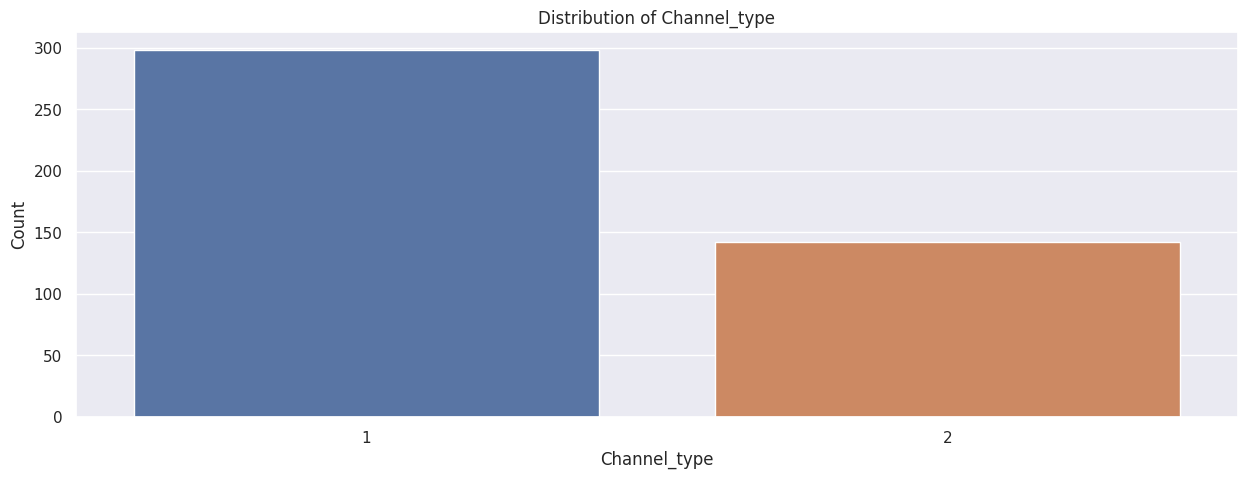

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of Channel_type')
sns.barplot(x='Channel_type',y='Count',data=Channel_df)

In [ ]:
# Region wise values count
Region_df=df['Region'].value_counts().reset_index()
Region_df.rename(columns={'index': 'Region_type'}, inplace=True)
Region_df.rename(columns={'Region': 'Count'}, inplace=True)
Region_df.head()

,Region_type,Count
0,3,316
1,1,77
2,2,47


<Axes: title={'center': 'Distribution of Region_type'}, xlabel='Region_type', ylabel='Count'>

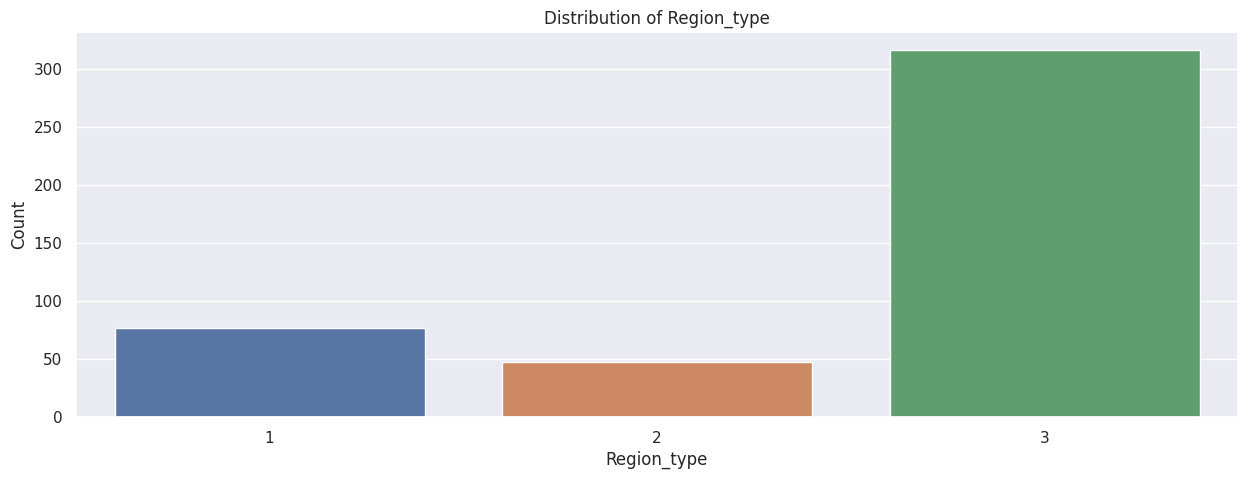

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of Region_type')
sns.barplot(x='Region_type',y='Count',data=Region_df)

In [ ]:
df.Fresh.describe([.75,.90,.95,.99])

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
50%        8504.000000
75%       16933.750000
90%       27090.500000
95%       36818.500000
99%       56082.610000
max      112151.000000
Name: Fresh, dtype: float64

## observations
1. only 1% of customers are  spending max 112151 on Fresh

<Axes: title={'center': 'Distribution of Fresh'}, xlabel='Fresh', ylabel='Density'>

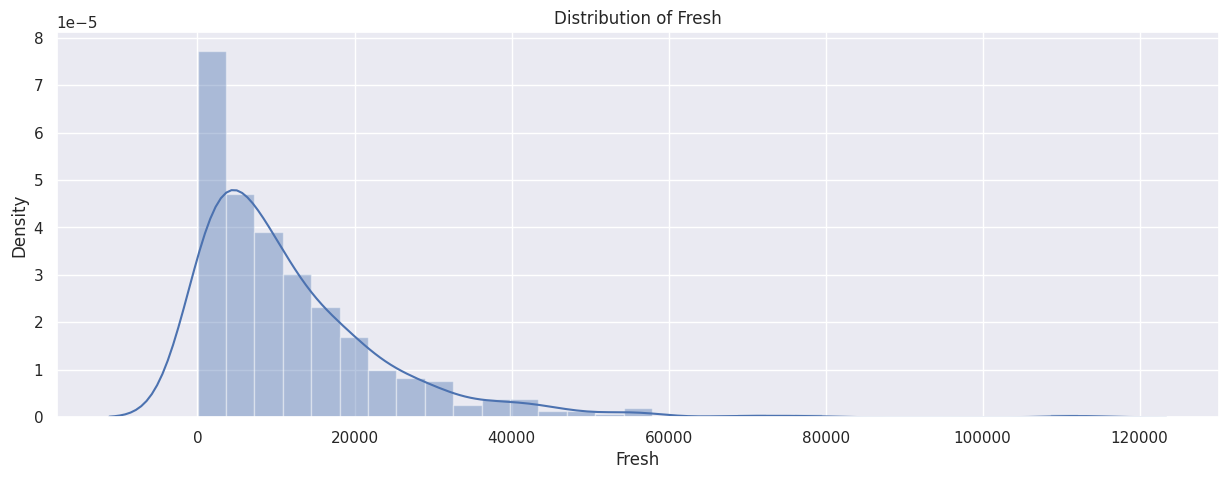

In [ ]:
#distribution of Fresh
plt.figure(figsize=(15,5))
plt.title("Distribution of Fresh")
sns.distplot(df['Fresh'])

In [ ]:
df.Milk.describe([.75,.90,.95,.99])

count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
50%       3627.000000
75%       7190.250000
90%      12229.900000
95%      16843.400000
99%      37610.060000
max      73498.000000
Name: Milk, dtype: float64

## observations
1. upto 99 percentile maximum spending has gone 37610
2. only 1% spending is 73498 on Milk

<Axes: title={'center': 'Distribution of Milk'}, xlabel='Milk', ylabel='Density'>

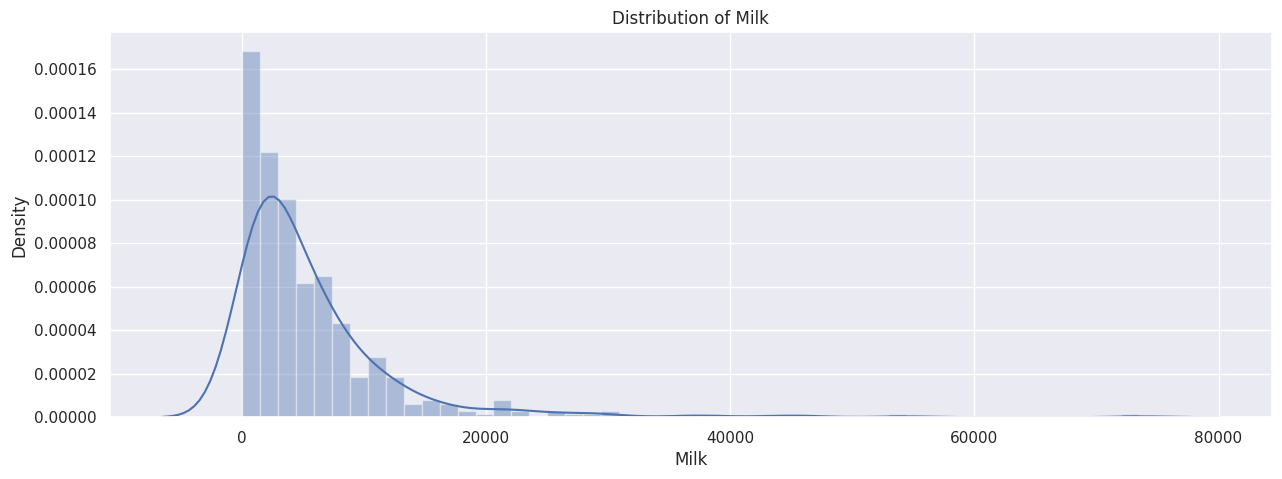

In [ ]:
#distribution of Milk
plt.figure(figsize=(15,5))
plt.title("Distribution of Milk")
sns.distplot(df['Milk'])

In [ ]:
df.Grocery.describe([.75,.90,.95,.99])

count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
50%       4755.500000
75%      10655.750000
90%      18910.100000
95%      24033.500000
99%      43435.740000
max      92780.000000
Name: Grocery, dtype: float64

## observations
1. upto 99 percentile maximum spending has gone 43435.74
2. only 1% spending is 92780.00 on Milk

<Axes: title={'center': 'Distribution of Grocery'}, xlabel='Grocery', ylabel='Density'>

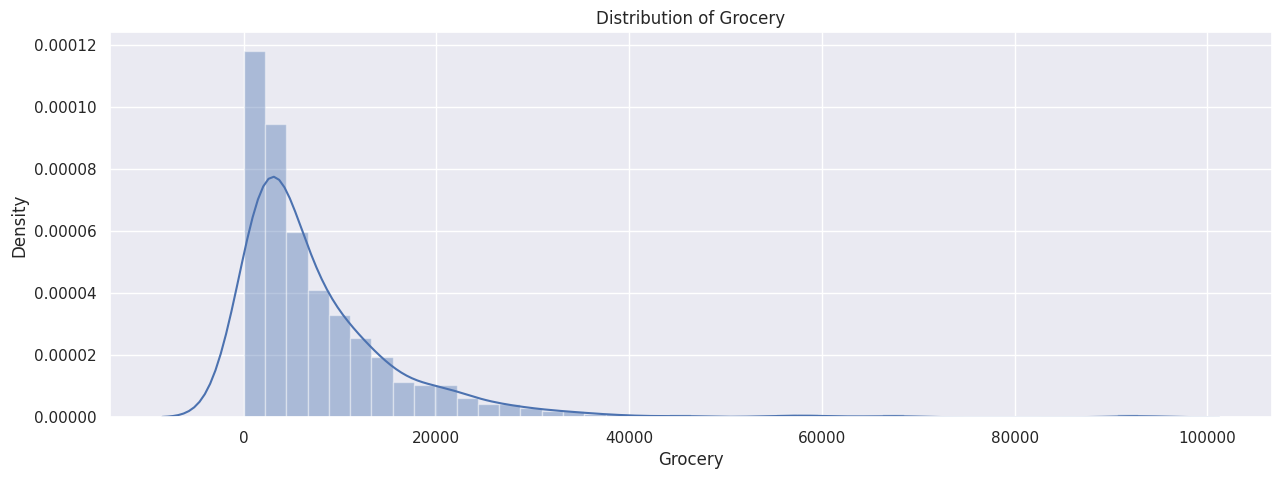

In [ ]:
#distribution of Grocery
plt.figure(figsize=(15,5))
plt.title("Distribution of Grocery")
sns.distplot(df['Grocery'])

In [ ]:
df.Frozen.describe([.75,.90,.95,.99])

count      440.000000
mean      3071.931818
std       4854.673333
min         25.000000
50%       1526.000000
75%       3554.250000
90%       7545.300000
95%       9930.750000
99%      17964.820000
max      60869.000000
Name: Frozen, dtype: float64

1. upto 99 percentile maximum spending has gone 17964.82
2. only 1% spending is 60869.00 on Frozen

<Axes: title={'center': 'Distribution of Frozen'}, xlabel='Frozen', ylabel='Density'>

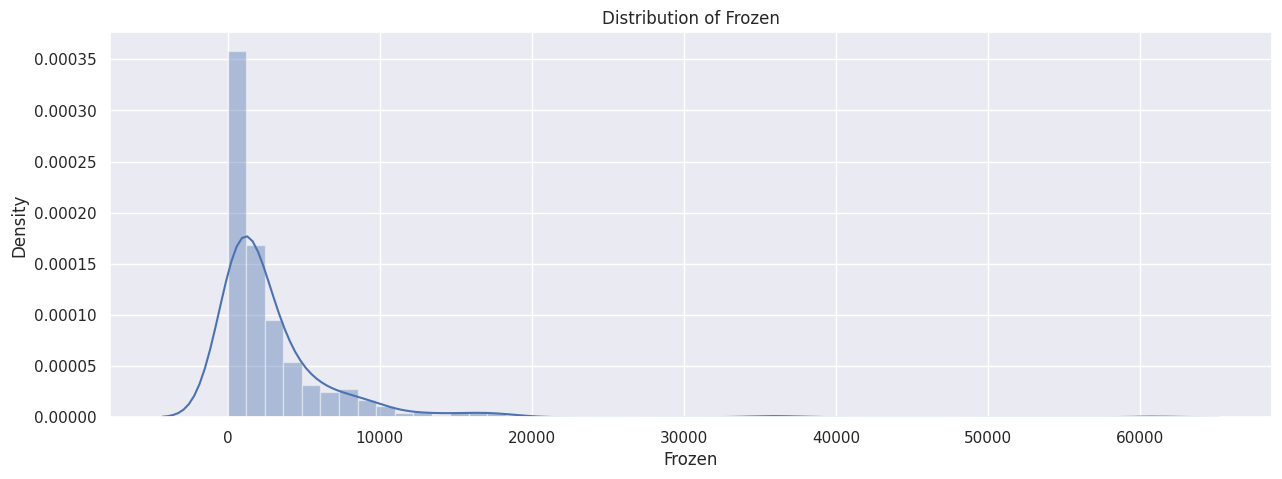

In [ ]:
#distribution of Forzen
plt.figure(figsize=(15,5))
plt.title("Distribution of Frozen")
sns.distplot(df['Frozen'])

In [ ]:
df.Detergents_Paper.describe([.75,.90,.95,.99])

count      440.000000
mean      2881.493182
std       4767.854448
min          3.000000
50%        816.500000
75%       3922.000000
90%       7438.300000
95%      12043.200000
99%      22571.610000
max      40827.000000
Name: Detergents_Paper, dtype: float64

<Axes: title={'center': 'Distribution of Detergents_Paper'}, xlabel='Detergents_Paper', ylabel='Density'>

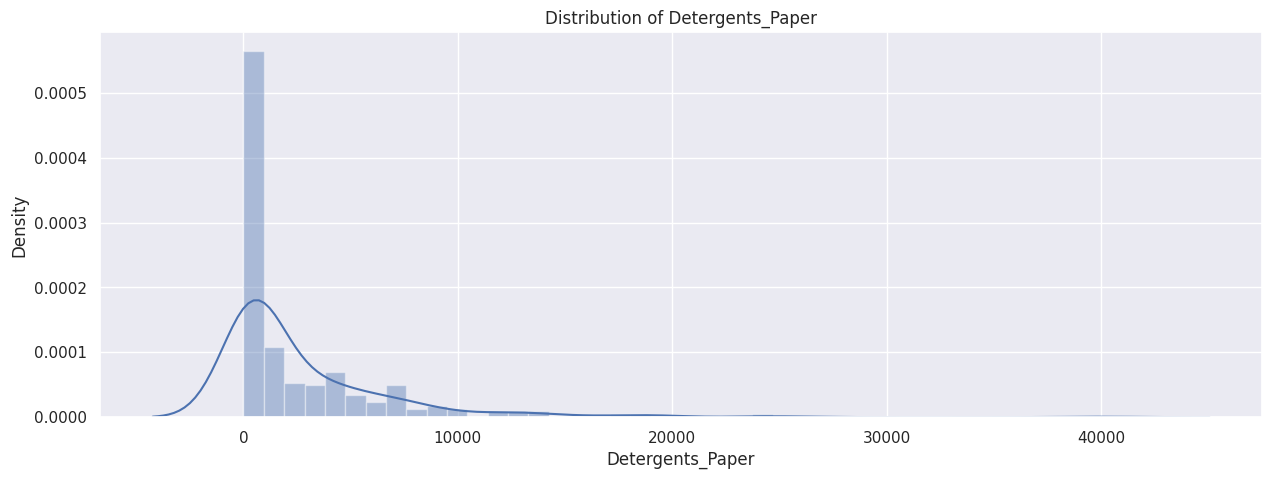

In [ ]:
#distribution of Detergents_Paper
plt.figure(figsize=(15,5))
plt.title("Distribution of Detergents_Paper")
sns.distplot(df['Detergents_Paper'])

In [ ]:
df.Delicassen.describe([.75,.90,.95,.99])

count      440.000000
mean      1524.870455
std       2820.105937
min          3.000000
50%        965.500000
75%       1820.250000
90%       2945.900000
95%       4485.400000
99%       8274.660000
max      47943.000000
Name: Delicassen, dtype: float64

<Axes: title={'center': 'Distribution of Delicassen'}, xlabel='Delicassen', ylabel='Density'>

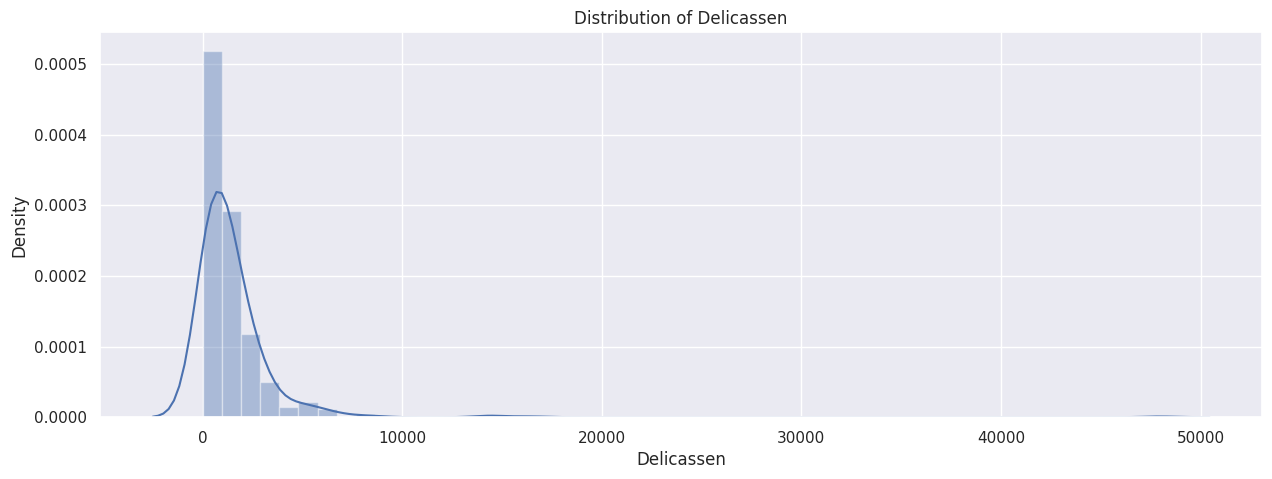

In [ ]:
#distribution of Delicassen
plt.figure(figsize=(15,5))
plt.title("Distribution of Delicassen")
sns.distplot(df['Delicassen'])

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].apply(np.log, axis = 1).round(3)

In [ ]:
Log_Tfd_Data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.447,9.175,8.931,5.366,7.891,7.199
1,8.862,9.191,9.166,7.474,8.100,7.482


<Axes: xlabel='Fresh', ylabel='Density'>

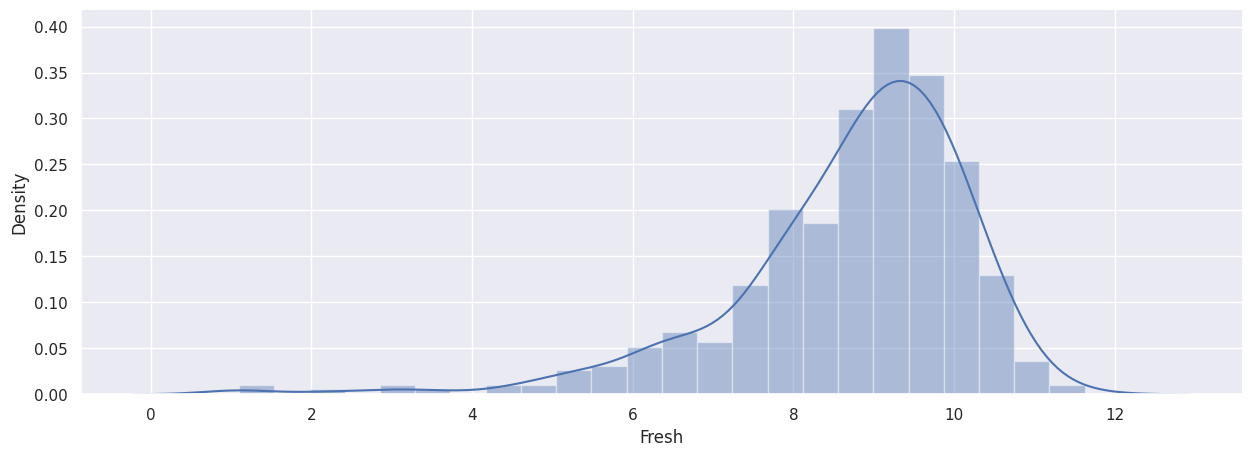

In [ ]:
#Data distribution after data normalization for Fresh
Fresh_Plot = Log_Tfd_Data['Fresh']
plt.figure(figsize=(15,5))
sns.distplot(Fresh_Plot)

<Axes: xlabel='Milk', ylabel='Density'>

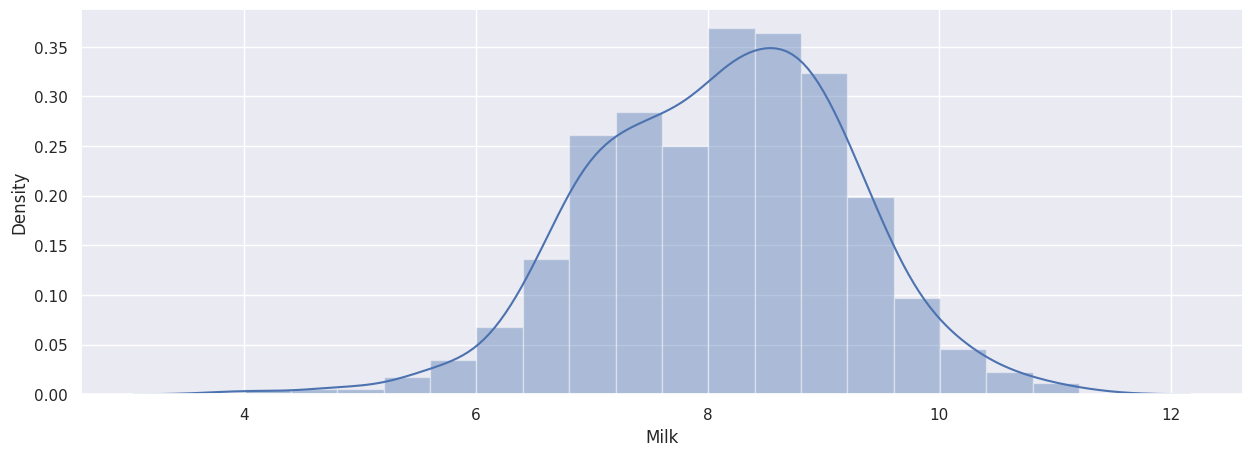

In [ ]:
#Data distribution after data normalization for Milk
Fresh_Plot = Log_Tfd_Data['Milk']
plt.figure(figsize=(15,5))
sns.distplot(Fresh_Plot)

In [ ]:
from sklearn import preprocessing
df['Fresh_log'] = df['Fresh'].apply(math.log)
df['Milk_log'] = df['Milk'].apply(math.log)
df['Grocery_log'] = df['Grocery'].apply(math.log)
df['Frozen_log'] = df['Frozen'].apply(math.log)
df['Detergents_Paper_log'] = df['Detergents_Paper'].apply(math.log)
df['Delicassen_log'] = df['Delicassen'].apply(math.log)

In [ ]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
0,2,3,12669,9656,7561,214,2674,1338,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,2,3,7057,9810,9568,1762,3293,1776,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119


In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Fresh_log', 'Milk_log',
       'Grocery_log', 'Frozen_log', 'Detergents_Paper_log', 'Delicassen_log'],
      dtype='object')

# **K-Means Clustering**

#**Applying Silhouette Score Method on Features 'Fresh_log', 'Milk_log','Grocery_log', 'Frozen_log', 'Detergents_Paper_log', 'Delicassen_log**

In [ ]:
feature_vector=['Fresh_log', 'Milk_log',
       'Grocery_log', 'Frozen_log', 'Detergents_Paper_log', 'Delicassen_log']
X_features=df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.2900388326883205
For n_clusters = 3 The average silhouette_score is : 0.25774265578518757
For n_clusters = 4 The average silhouette_score is : 0.18773105015767078
For n_clusters = 5 The average silhouette_score is : 0.20023247222161036
For n_clusters = 6 The average silhouette_score is : 0.20586285060712933
For n_clusters = 7 The average silhouette_score is : 0.19179446436154654
For n_clusters = 8 The average silhouette_score is : 0.1979567428930758
For n_clusters = 9 The average silhouette_score is : 0.17013396043451623
For n_clusters = 10 The average silhouette_score is : 0.1746395954835269
For n_clusters = 11 The average silhouette_score is : 0.19852006617454548
For n_clusters = 12 The average silhouette_score is : 0.18643629333827047
For n_clusters = 13 The average silhouette_score is : 0.1753409913690212
For n_clusters = 14 The average silhouette_score is : 0.17884629278637448
For n_clusters = 15 The average silhouette_score i

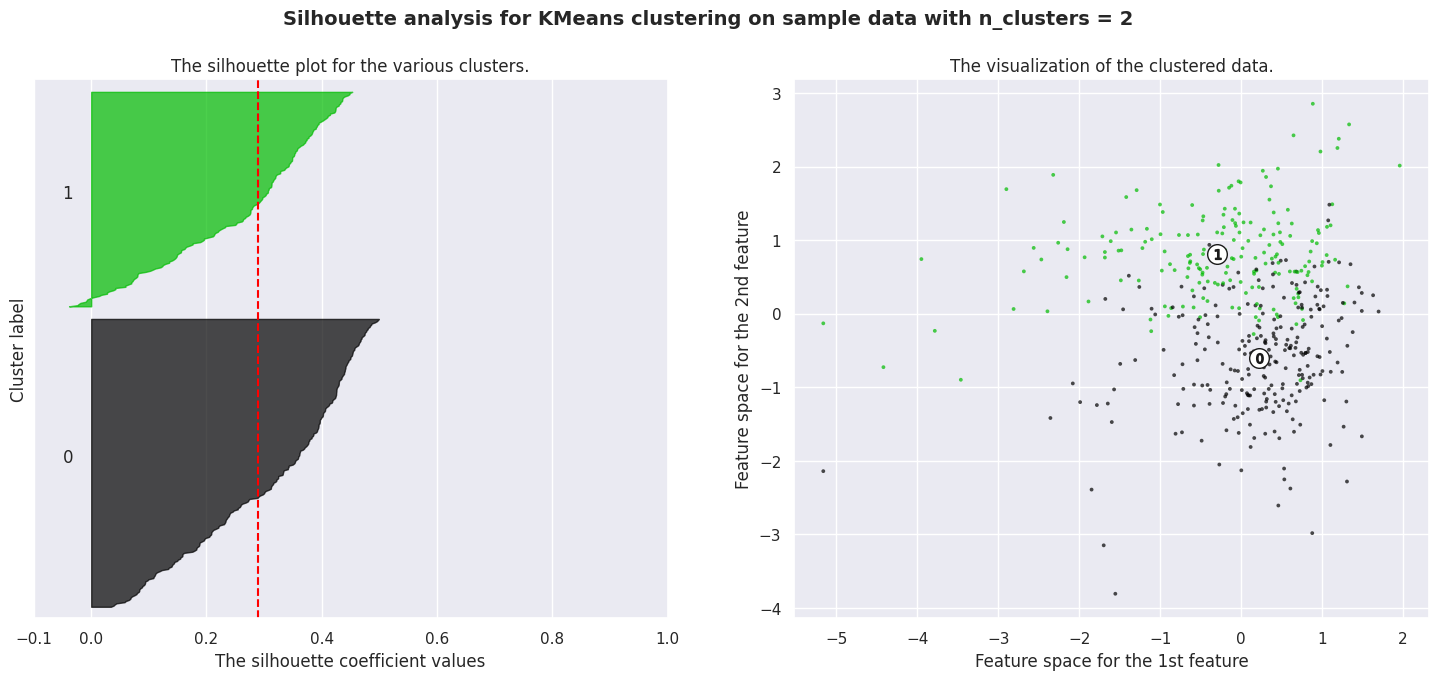

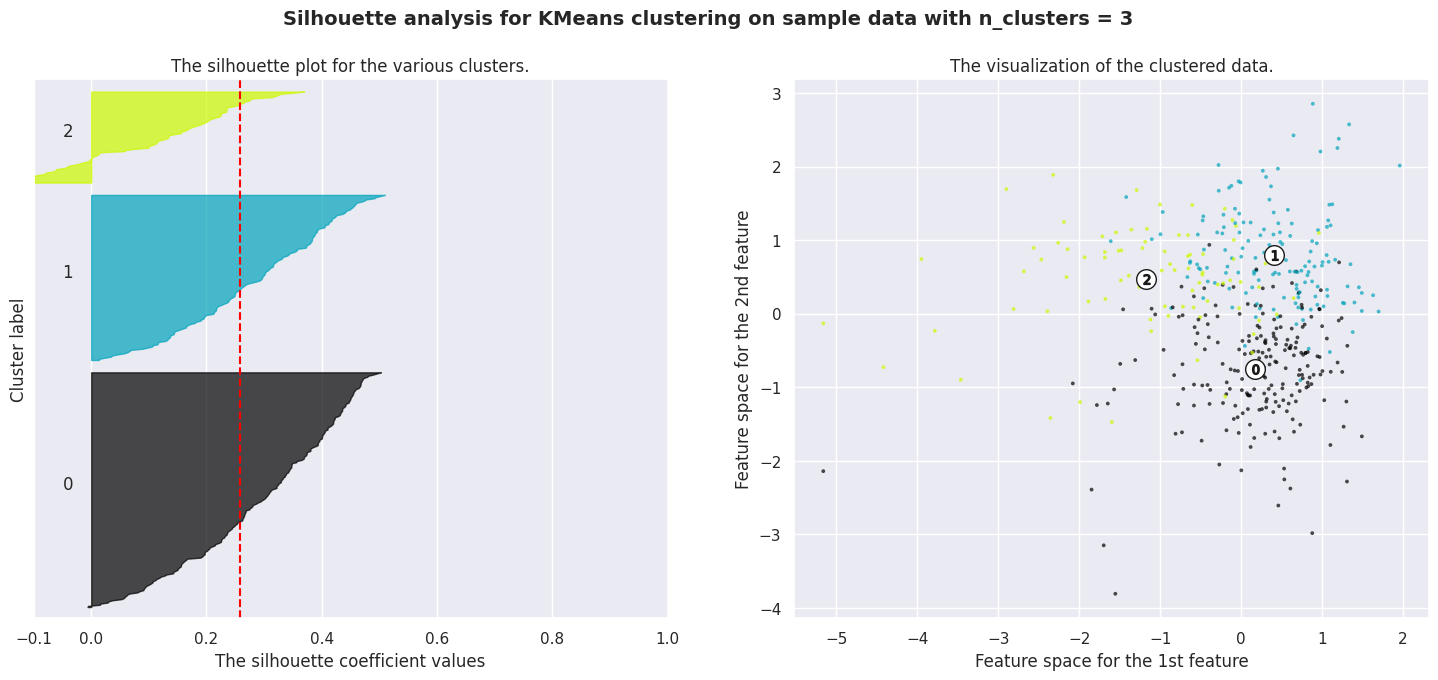

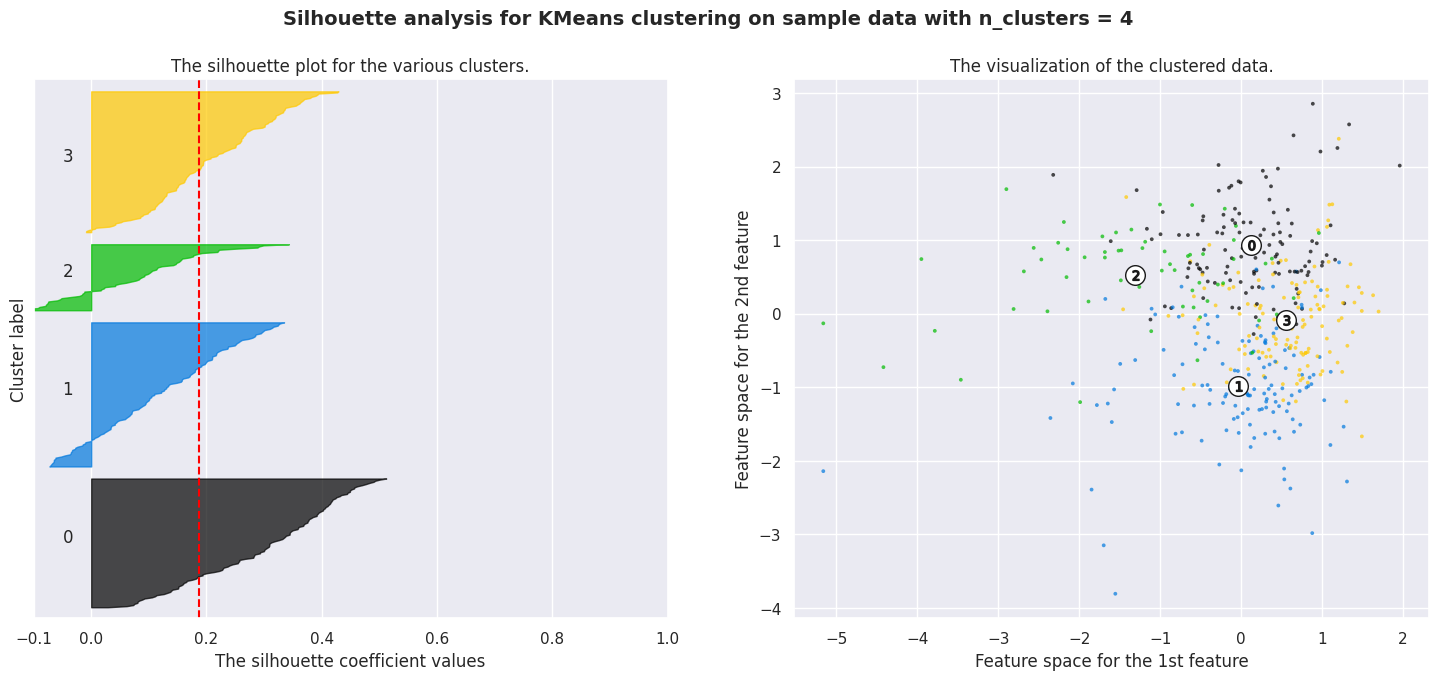

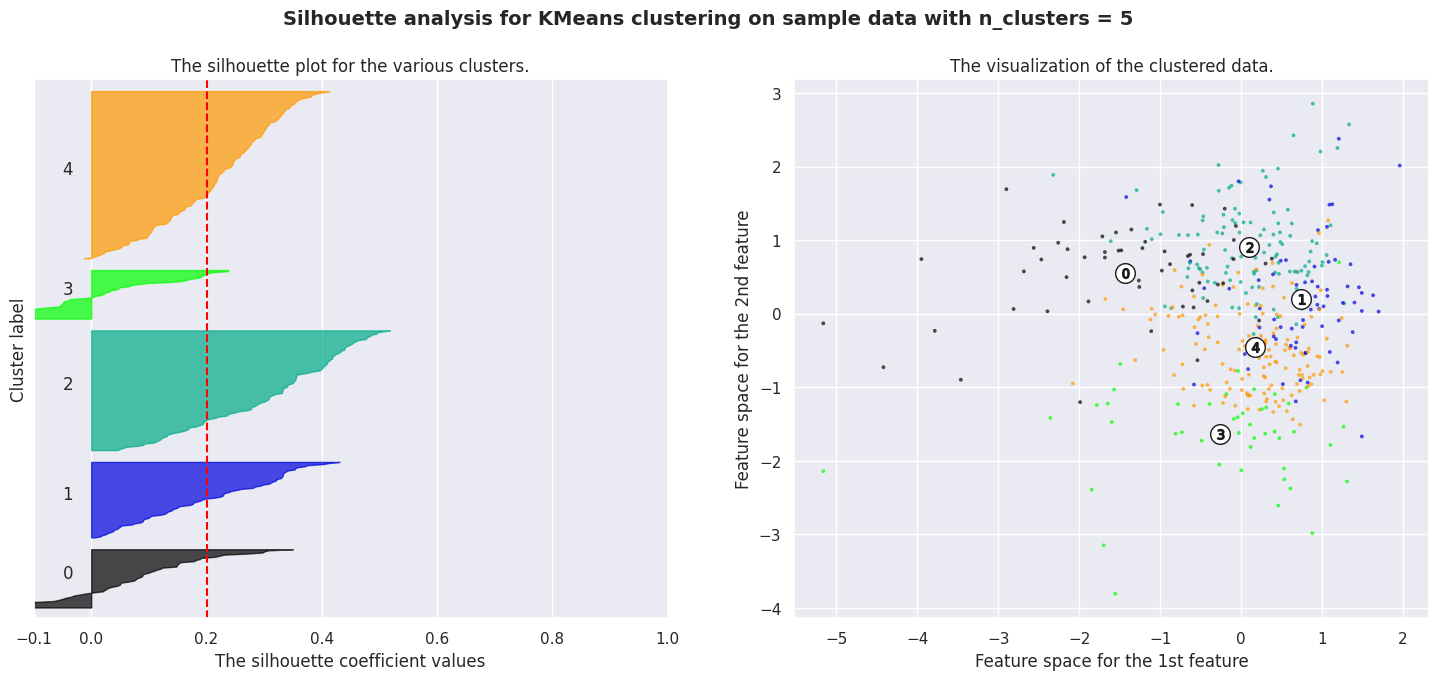

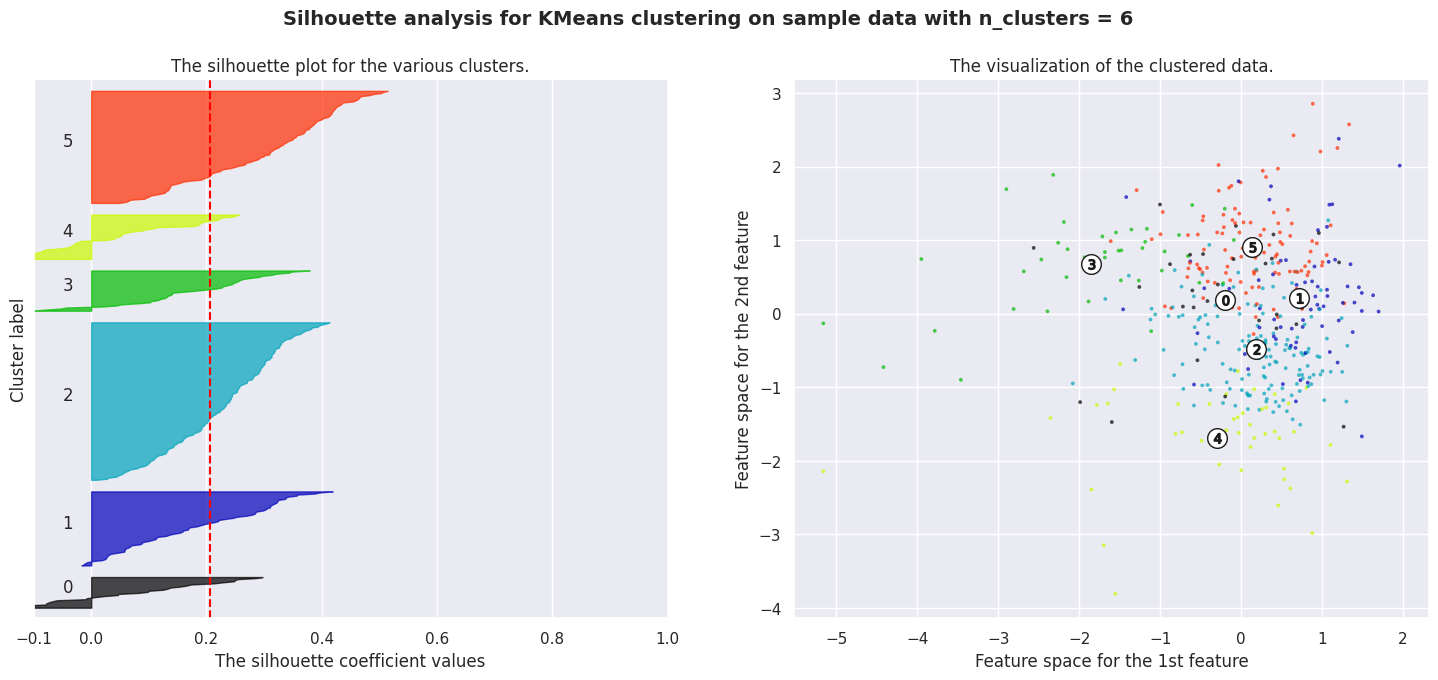

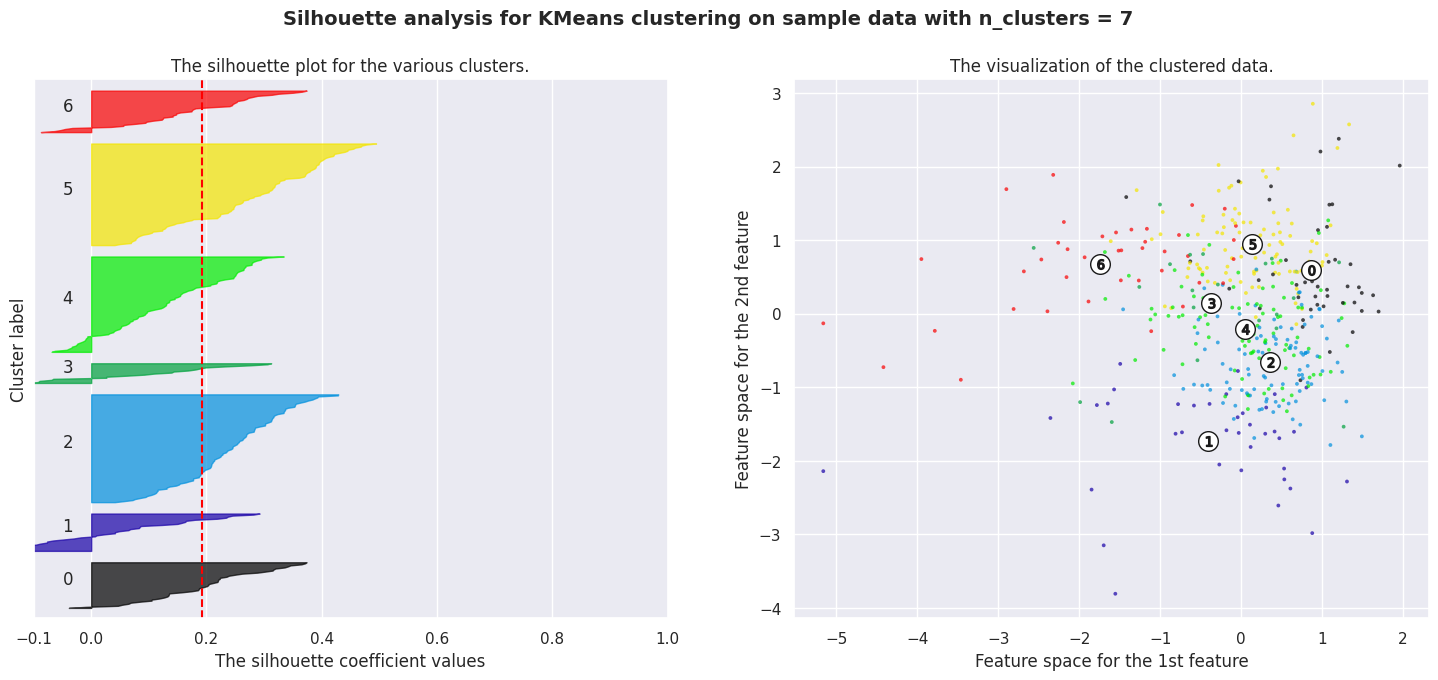

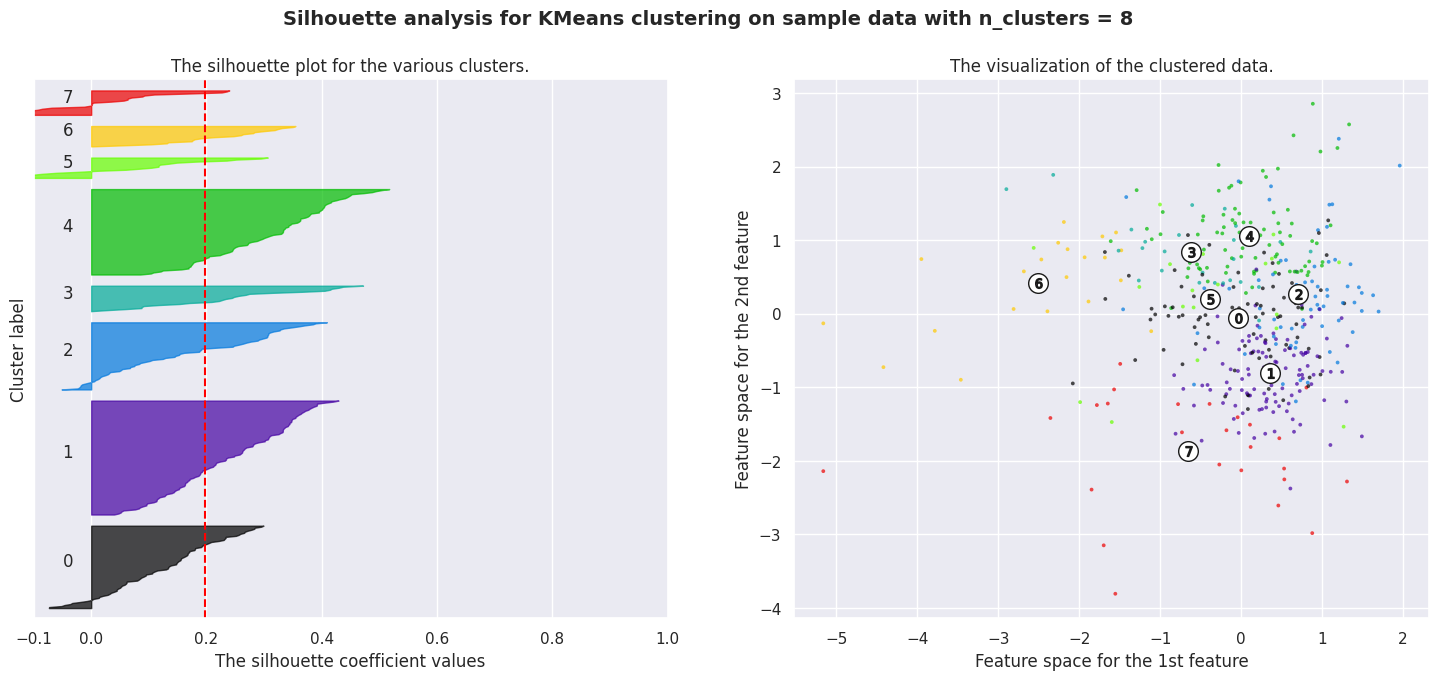

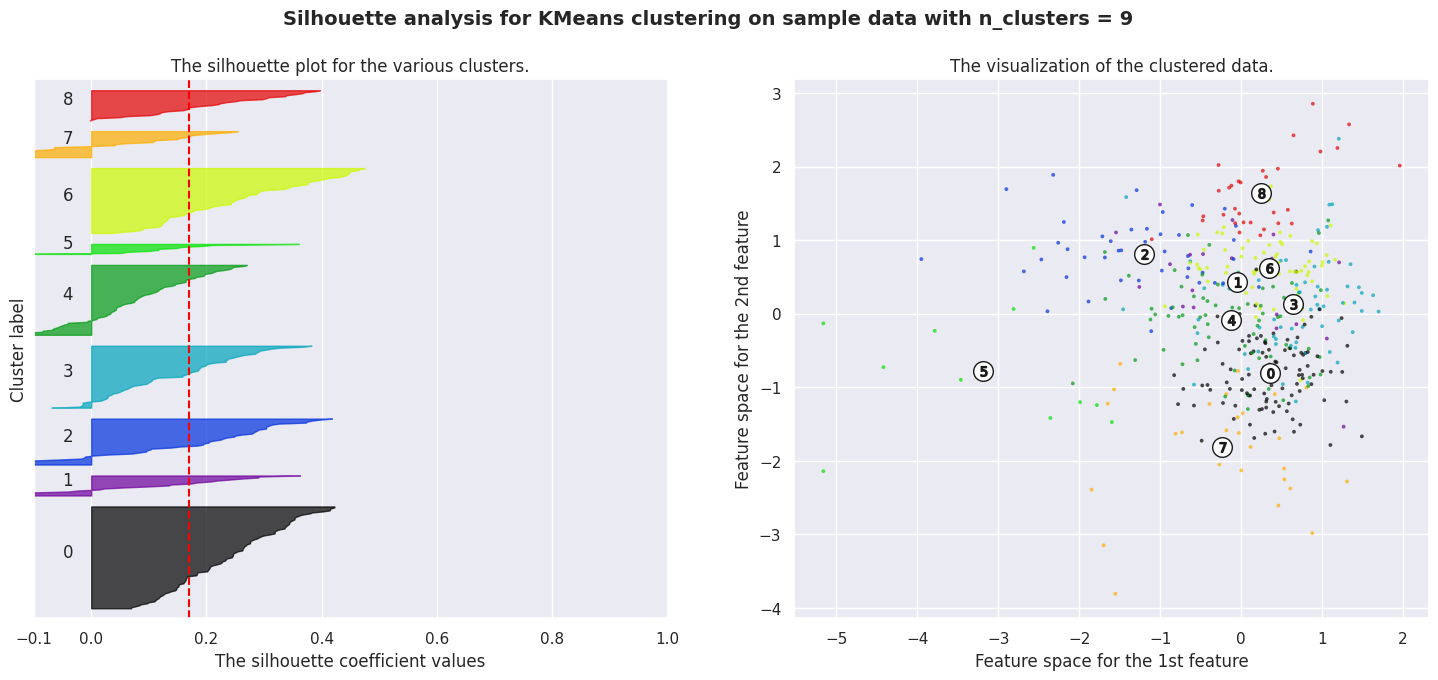

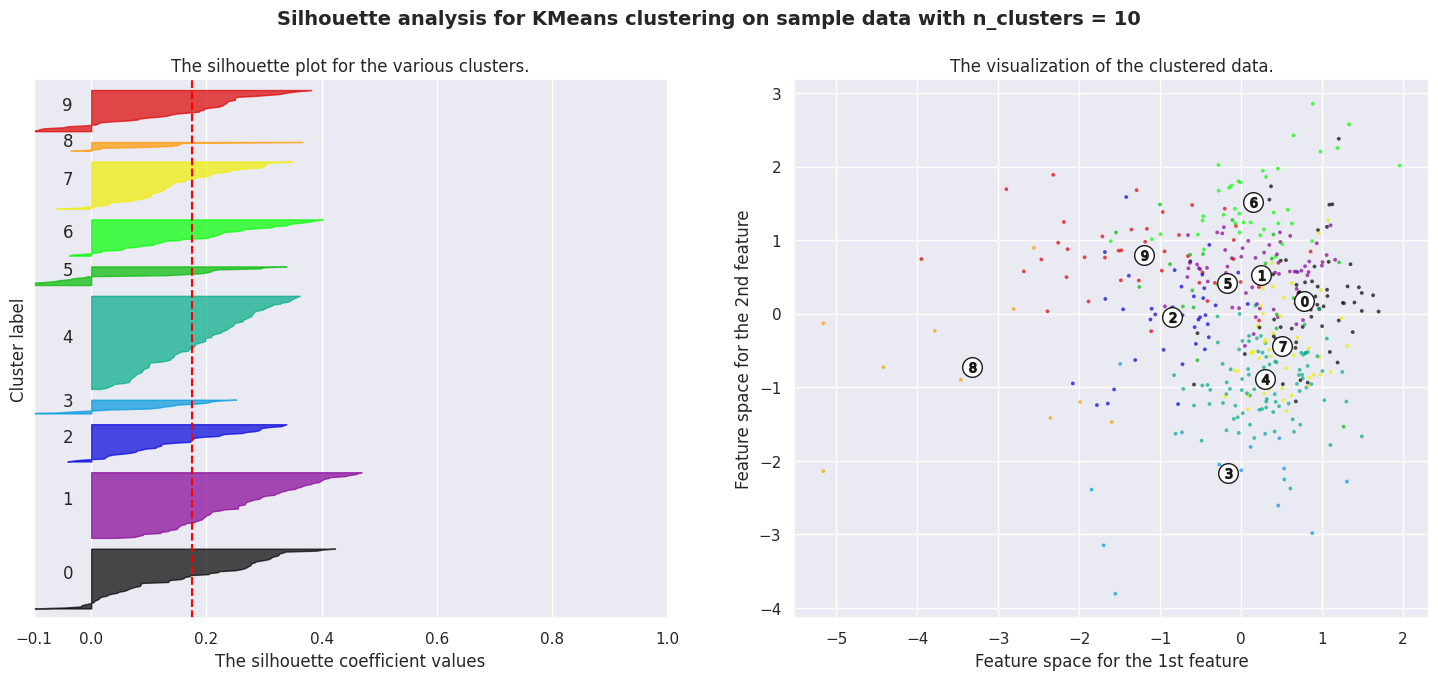

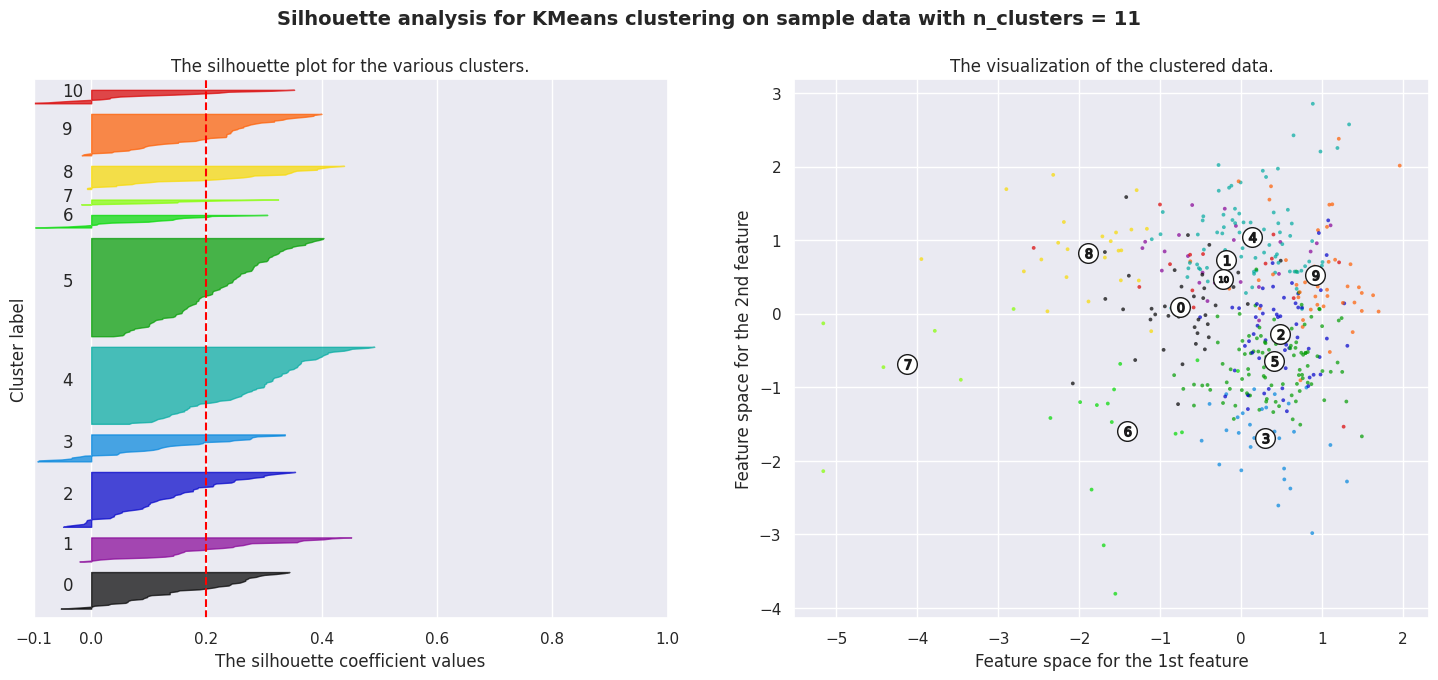

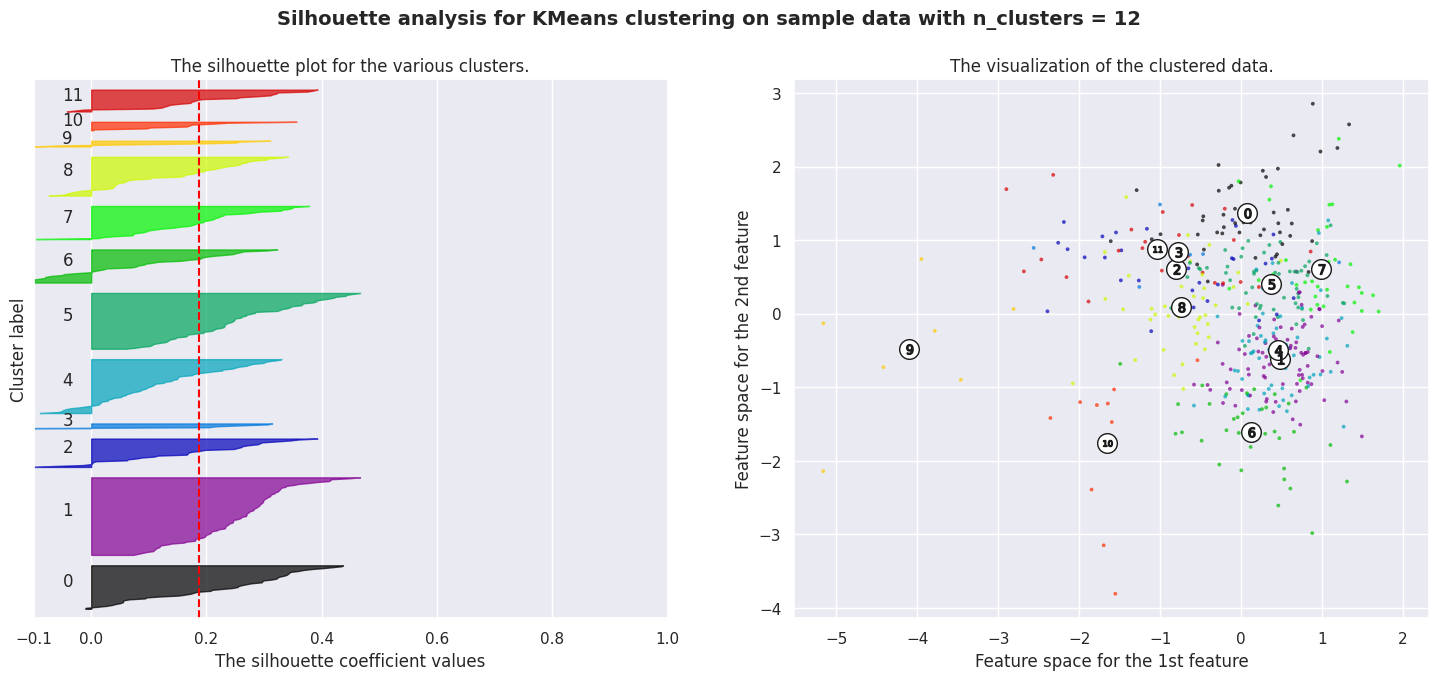

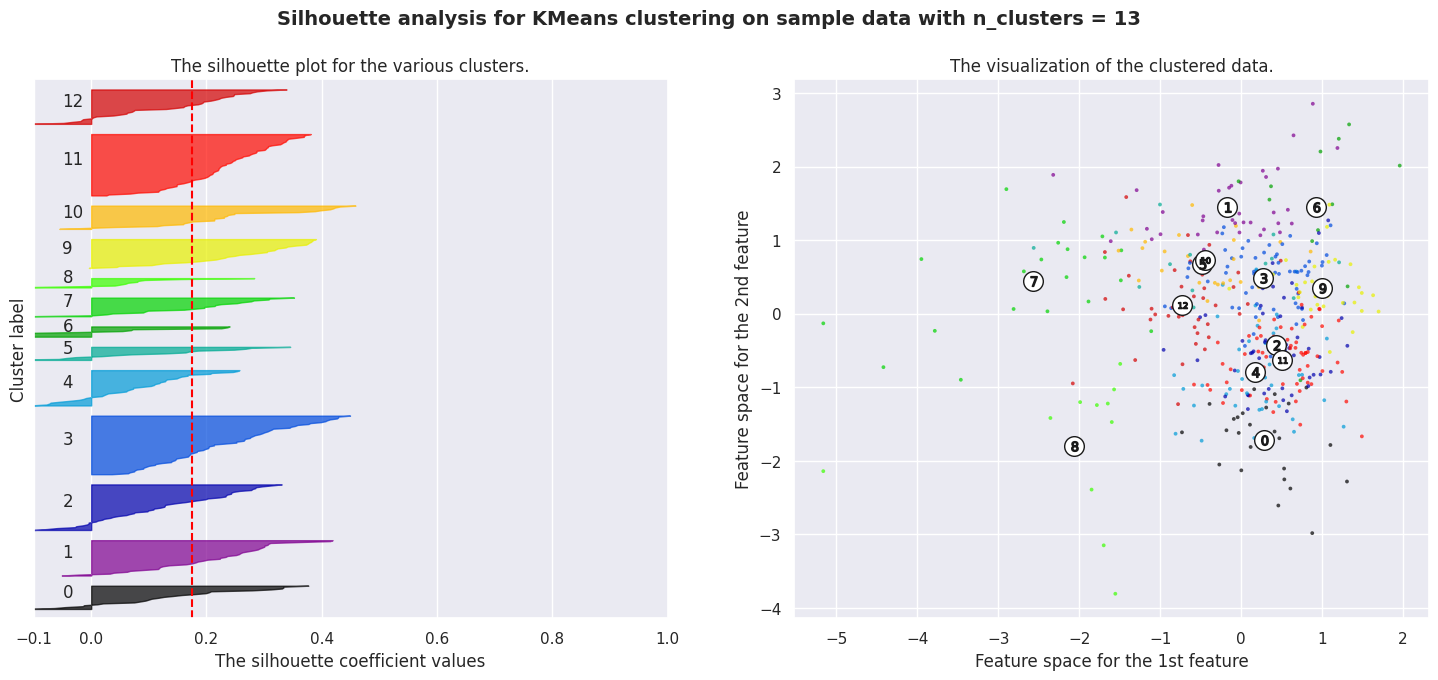

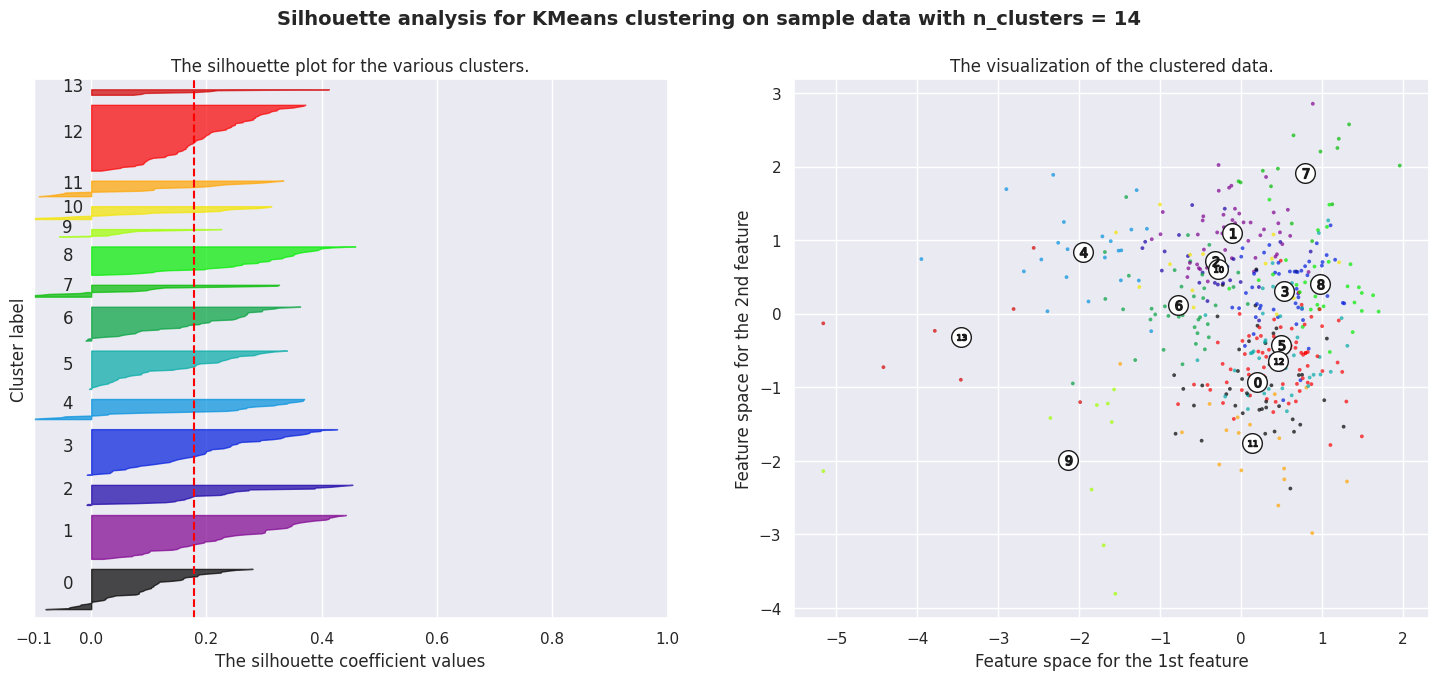

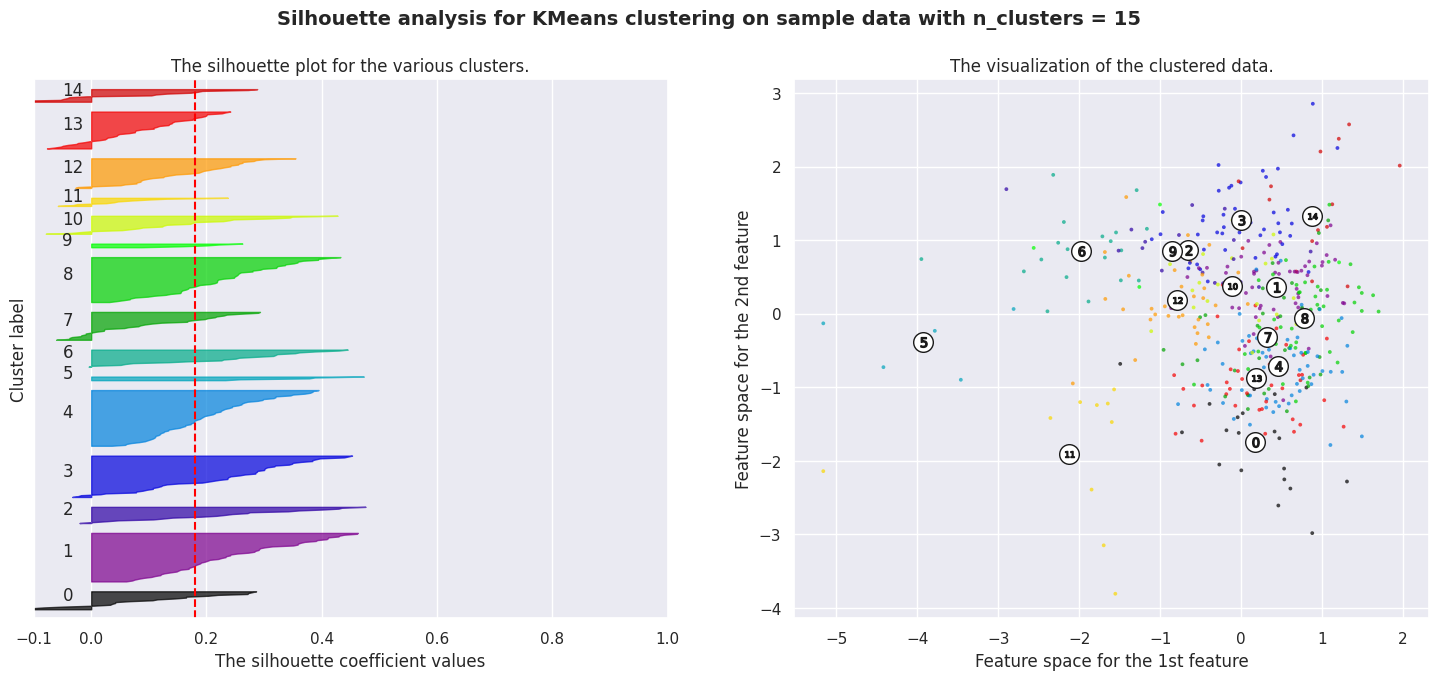

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Observations
1. 1st part of fig : plots silhouette_score for each data points for each cluster ,Red dash vertical line represents average silhouette_score for the respective cluster
2. 2nd part of fig : plots first two features

## **Plot Average silhoutte Score cluster wise:**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Fresh_log', 'Milk_log',
       'Grocery_log', 'Frozen_log', 'Detergents_Paper_log', 'Delicassen_log']
X_features_rec_mon=df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
sil_score_list =[]
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    sil_score_list.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2900388326883205
For n_clusters = 3, silhouette score is 0.25809353527989265
For n_clusters = 4, silhouette score is 0.18777600406796272
For n_clusters = 5, silhouette score is 0.19085434786825878
For n_clusters = 6, silhouette score is 0.18928294201427295
For n_clusters = 7, silhouette score is 0.18386091489429293
For n_clusters = 8, silhouette score is 0.1918981027457685
For n_clusters = 9, silhouette score is 0.19769747392130982
For n_clusters = 10, silhouette score is 0.15866290133994065
For n_clusters = 11, silhouette score is 0.17249686409535658
For n_clusters = 12, silhouette score is 0.17369048191077238
For n_clusters = 13, silhouette score is 0.18432541882607373
For n_clusters = 14, silhouette score is 0.17100524803487965
For n_clusters = 15, silhouette score is 0.16677744780661846


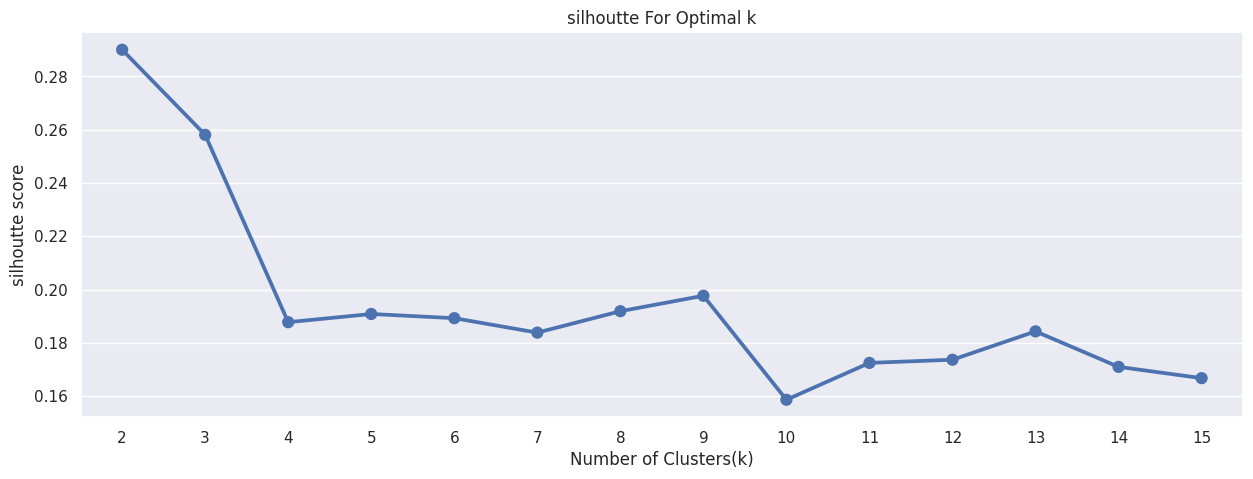

In [ ]:
plt.figure(figsize = (15,5))
sns.pointplot( x=range_n_clusters , y = sil_score_list)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('silhoutte score')
plt.title('silhoutte For Optimal k')
plt.show()

#**Applying Elbow Method On Features : 'Fresh_log', 'Milk_log','Grocery_log', 'Frozen_log', 'Detergents_Paper_log', 'Delicassen_log**

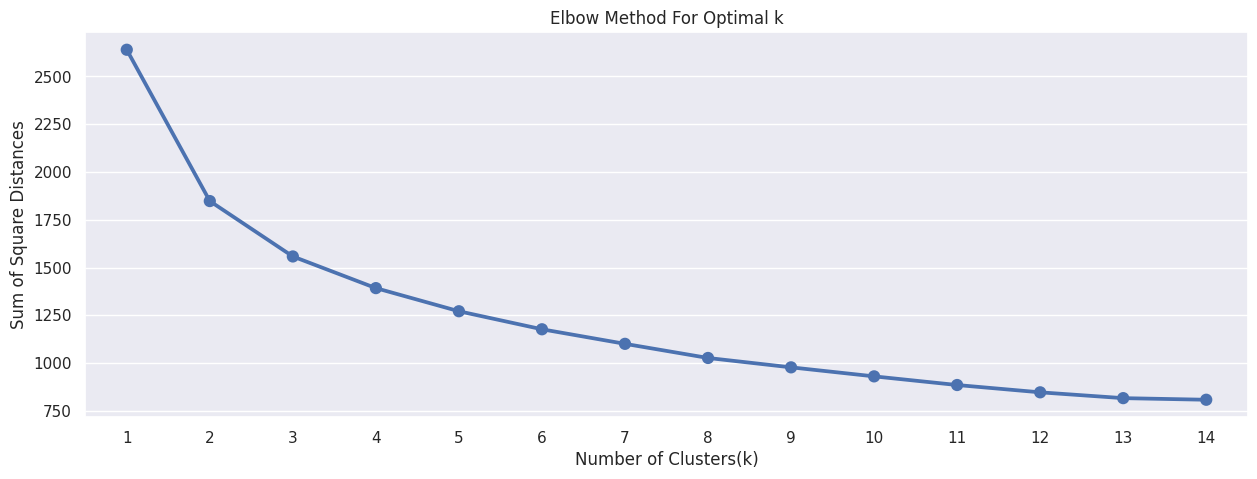

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,5))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 5 ,init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

KMeans(max_iter=1000, n_clusters=5)

In [ ]:
df['Cluster'] = KMean_clust.labels_
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log,Cluster
0,2,3,12669,9656,7561,214,2674,1338,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,3
1,2,3,7057,9810,9568,1762,3293,1776,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,3
2,2,3,6353,8808,7684,2405,3516,7844,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,3
3,1,3,13265,1196,4221,6404,507,1788,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,4
4,2,3,22615,5410,7198,3915,1777,5185,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,4
5,2,3,9413,8259,5126,666,1795,1451,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008,0
6,2,3,12126,3199,6975,480,3140,545,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786,0
7,2,3,7579,4956,9426,1669,3321,2566,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104,3
8,1,3,5963,3648,6192,425,1716,750,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073,0
9,2,3,6006,11093,18881,1159,7425,2098,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740,3


#**Dendogram to find the optimal number of clusters**

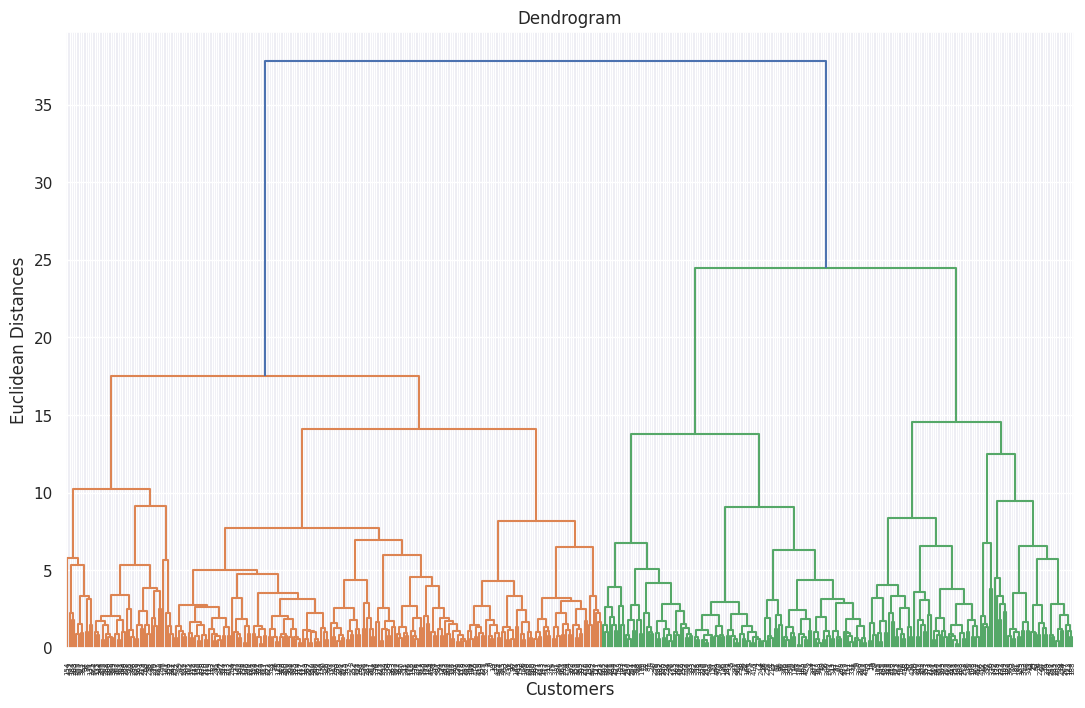

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

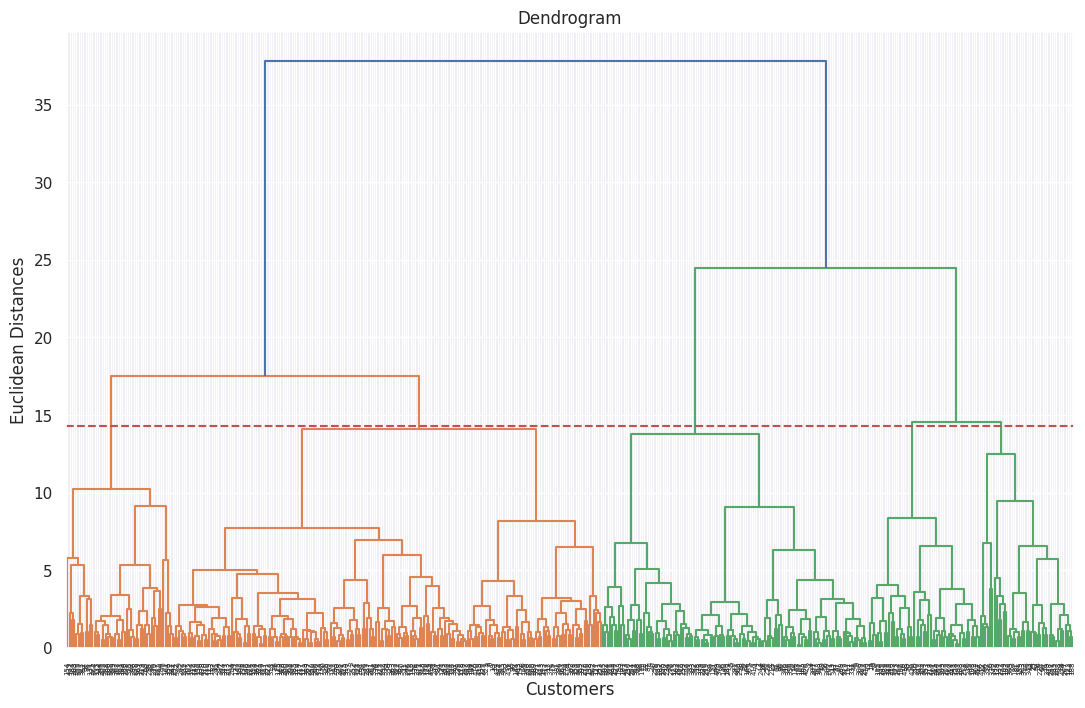

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=14.27, color='r', linestyle='--')   #for 5 y =14.27
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

## **Observations**
### The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. 

### No. of Cluster  = 5

In [ ]:
# Cluster Wise Value counts 
Channel_df=df['Cluster'].value_counts().reset_index()
Channel_df.rename(columns={'index': 'Cluster_type'}, inplace=True)
Channel_df.rename(columns={'Cluster': 'Count'}, inplace=True)
Channel_df.head()

,Cluster_type,Count
0,3,100
1,4,100
2,0,96
3,1,90
4,2,54


<Axes: title={'center': 'Distribution of Cluster'}, xlabel='Cluster_type', ylabel='Count'>

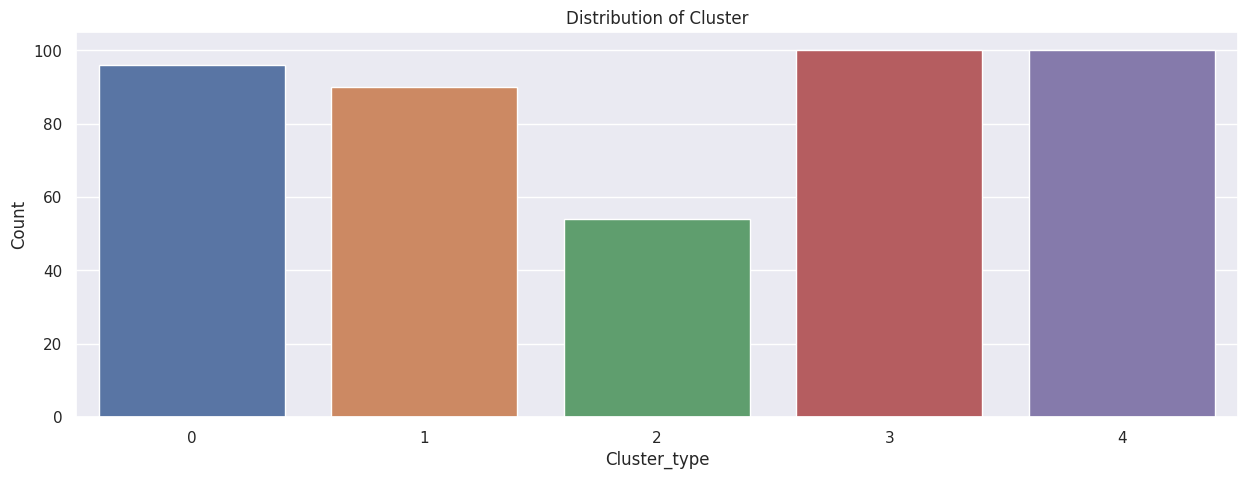

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of Cluster')
sns.barplot(x='Cluster_type',y='Count',data=Channel_df)

In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Fresh_log', 'Milk_log',
       'Grocery_log', 'Frozen_log', 'Detergents_Paper_log', 'Delicassen_log',
       'Cluster'],
      dtype='object')

##**Profiling customers**:


In [ ]:
#Group cluster based on features mean :'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'
gb = df.groupby(['Cluster'])[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean().round()
print(gb)

           Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Cluster                                                                 
0        10551.0   3473.0   4220.0   922.0             952.0      1068.0
1         9751.0   1215.0   1750.0  2821.0             300.0       460.0
2         2226.0   7236.0  13400.0   561.0            5852.0       654.0
3        11341.0  13054.0  17591.0  2167.0            7639.0      2352.0
4        21353.0   4115.0   4532.0  7622.0             695.0      2566.0


<Axes: title={'center': 'mean of features cluster wise '}, xlabel='Cluster'>

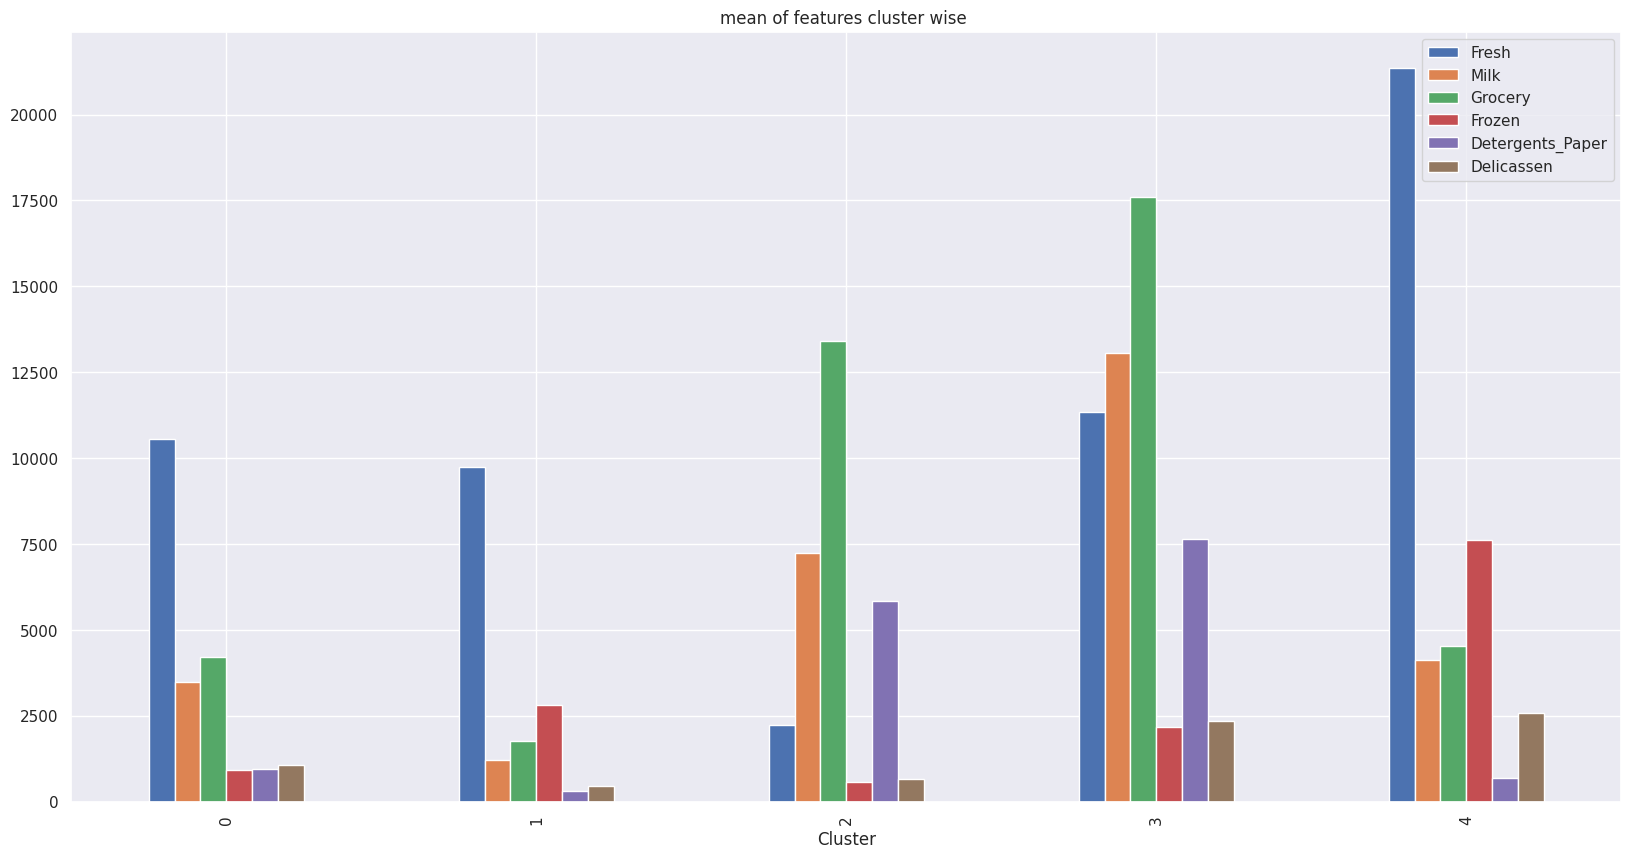

In [ ]:
#bar plot for above analysis:
gb.plot(kind='bar',figsize=(20,10) ,title= 'mean of features cluster wise ')

## **Final Conclusion**
[Q] which segments may be receptive to new product offerings?

[A] cluster 4 customers are Dominant to other clusters and is receptive to new product offerings.


[Q] how to optimize operations and increase customer satisfaction and
retention?

[A] cluster 1 customers are less Dominant to other clusters,we can run multiple  campaign to retain  them back to spend more.